Enter keyword/hashtag to search about :modi
Enter how many tweets to analyze :50
RT @Pun_Starr: NaMo TV is a channel dedicated to PM Modi's speeches and rallies.

Apparently, it was launched ahead of elections to appease…
RT @SitaramYechury: More evidence of damage and destruction unleashed by Modi's Notebandi. Huge loss of jobs and severe income drop for the…
Big ups to @vivekoberoi for his calm, confident and clinical taking apart of @nagma_morarji &amp; @sardesairajdeep over… https://t.co/L7cT3jxmrc
RT @vidya7281: BJP hires four trains for Rs 53 lakh to ferry supporters for Modi's Kolkata rally 

Hiring People to show the crowd in Modi’…
RT @ndtv: UAE confers Prime Minister Narendra Modi with the Zayed Medal, tweets Abu Dhabi Crown prince Mohamed bin Zayed Al Nahyan https://…
RT @KiranKS: Still some people ask...what did @narendramodi do for the people of Andhra Pradesh! 

#Polavaram project which was just on pap…
Varanasi Loksabha seat against PM Modi AAP gives it to congress, Cong

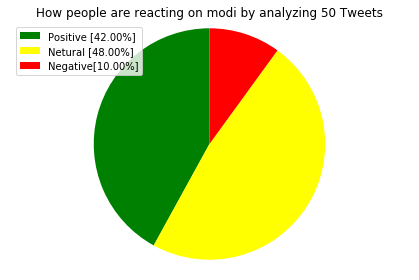

In [20]:
from textblob import TextBlob
import sys, tweepy
import matplotlib.pyplot as plt
%matplotlib inline


def percentage(part, whole):
    return 100* float(part) / float(whole)

# craete a developer account on twiter and create these keys.
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret= ""

# for establish a conection to twitter.
auth = tweepy.OAuthHandler(consumer_key=consumerKey , consumer_secret=consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

serachItem = input("Enter keyword/hashtag to search about :")
numberofSearchTerms = int(input("Enter how many tweets to analyze :"))

tweets = tweepy.Cursor(api.search , q=serachItem, lang='en').items(numberofSearchTerms)

positive = 0
negative = 0
netural = 0
polarity = 0

for tweet in tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity == 0):
        netural += 1
    elif(analysis.sentiment.polarity < 0.00):
        negative += 1
    elif(analysis.sentiment.polarity > 0.00):
        positive += 1
        

positive = percentage(positive , numberofSearchTerms)
negative = percentage(negative , numberofSearchTerms)
netural = percentage(netural , numberofSearchTerms)
polarity = percentage(polarity, numberofSearchTerms)


positive = format(positive , '.2f')
negative = format(negative , '.2f')
netural = format(netural , '.2f')
#polarity = format(polarity, '.2f')

print(polarity)

if(polarity == 0.00):
    print("Netural")
elif(polarity < 0.00):
    print("Negative")
elif(polarity > 0.00):
    print("positive")


labels = ['Positive ['+str(positive)+'%]', 'Netural ['+ str(netural)+'%]', 'Negative['+str(negative)+'%]']
sizes = [positive, netural, negative]
colors = ['green' , 'yellow', 'red']
patches , texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches , labels, loc="best")
plt.title("How people are reacting on " + serachItem + " by analyzing " + str(numberofSearchTerms) + " Tweets")
plt.axis('equal')
plt.tight_layout()
plt.show()
